In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
def read_csv_guess_date(path):
    df = pd.read_csv(path)
    for c in df.columns:
        if c.lower() in ('date', 'datum', 'zeit'):
            df[c] = pd.to_datetime(df[c], errors='coerce')
            df.rename(columns={c: 'date'}, inplace=True)
            return df
    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0], errors='coerce')
    df.rename(columns={df.columns[0]: 'date'}, inplace=True)
    return df

# read all CSVs from the 'data' folder
base = "data"
umsatz = read_csv_guess_date(os.path.join(base, "umsatzdaten_gekuerzt.csv"))
kiwo   = read_csv_guess_date(os.path.join(base, "kiwo.csv"))
wetter = read_csv_guess_date(os.path.join(base, "wetter.csv"))

print("umsatz columns:", umsatz.columns.tolist())
print("kiwo columns:", kiwo.columns.tolist())
print("wetter columns:", wetter.columns.tolist())

# rename the sales column if needed
if "umsatz" not in umsatz.columns:
    for alt in ["sales", "Umsatz", "amount"]:
        if alt in umsatz.columns:
            umsatz.rename(columns={alt: "umsatz"}, inplace=True)
            break

# merge on 'date'
df = (
    umsatz.merge(kiwo, on="date", how="outer", suffixes=("_ums", "_kiwo"))
          .merge(wetter, on="date", how="outer", suffixes=("", "_wetter"))
          .sort_values("date")
          .reset_index(drop=True)
)
df = df[df["date"].notna()]
df.head()


umsatz columns: ['id', 'date', 'Warengruppe', 'Umsatz']
kiwo columns: ['date', 'KielerWoche']
wetter columns: ['date', 'Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Wettercode']


,id,date,Warengruppe,umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,NaN,2012-01-01,NaN,NaN,NaN,8.0,9.8250,14.0,58.0
1,NaN,2012-01-02,NaN,NaN,NaN,7.0,7.4375,12.0,NaN
2,NaN,2012-01-03,NaN,NaN,NaN,8.0,5.5375,18.0,63.0
3,NaN,2012-01-04,NaN,NaN,NaN,4.0,5.6875,19.0,80.0
4,NaN,2012-01-05,NaN,NaN,NaN,6.0,5.3000,23.0,80.0


In [3]:
series = df["umsatz"].dropna().astype(float)

desc = series.describe()
print("Descriptive statistics for 'umsatz':\n", desc)
print("Skew:", series.skew(), " | Kurtosis:", series.kurtosis())


Descriptive statistics for 'umsatz':
 count    9334.000000
mean      206.749044
std       144.545189
min         7.051201
25%        96.897441
50%       161.900831
75%       280.644663
max      1879.461831
Name: umsatz, dtype: float64
Skew: 1.8320154611329023  | Kurtosis: 8.017525298144854


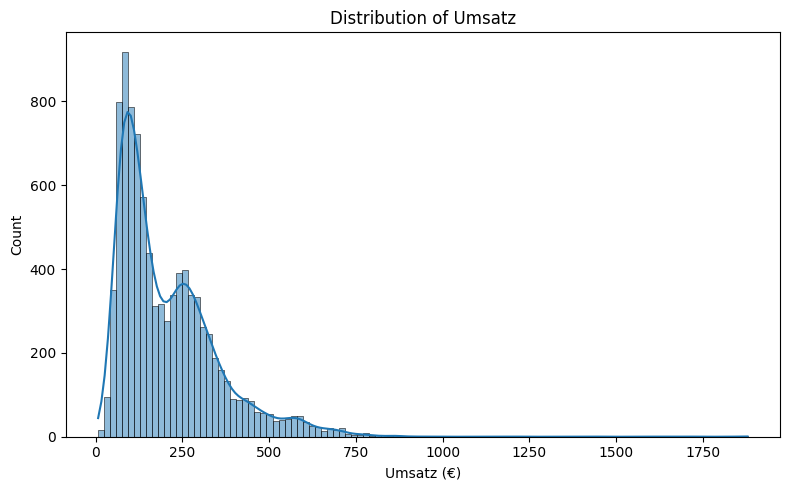

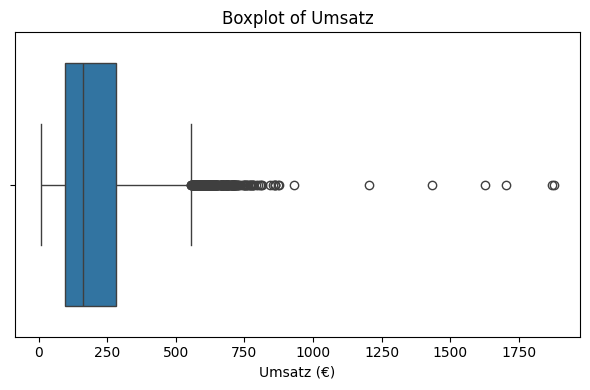

In [4]:
# Histogram + KDE
plt.figure(figsize=(8,5))
sns.histplot(series, kde=True)
plt.title("Distribution of Umsatz")
plt.xlabel("Umsatz (€)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=series)
plt.title("Boxplot of Umsatz")
plt.xlabel("Umsatz (€)")
plt.tight_layout()
plt.show()
